In [1]:
# imports

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

In [2]:
# import load_data function from loadData.py
from loadData import load_data

train_data, train_labels, test_data, test_labels = load_data()


# type of train_data
print("train_data")
print(type(train_data))
print(train_data.shape)

# type of train_labels
print("train_labels")
print(type(train_labels))
print(train_labels.shape)

# type of test_data
print("test_data")
print(type(test_data))
print(test_data.shape)

# type of test_labels
print("test_labels")
print(type(test_labels))
print(test_labels.shape)

Loading data
Data loaded
train_data
<class 'torch.Tensor'>
torch.Size([60000, 784])
train_labels
<class 'torch.Tensor'>
torch.Size([60000])
test_data
<class 'torch.Tensor'>
torch.Size([10000, 784])
test_labels
<class 'torch.Tensor'>
torch.Size([10000])


In [3]:
# Custom dataset class
class CSVDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y


In [4]:
# define the network class

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# define the training function

def train(model, train_loader, criterion, optimizer, epochs):
    loss_list = []
    for epoch in range(epochs):
        for input, data in enumerate(train_loader):
            input, labels = data
            optimizer.zero_grad()
            output = model(input)
            loss = criterion(output, labels)
            loss_list.append(loss.item())
            loss.backward()
            optimizer.step()
            if epoch % 10 == 0:
                print("Epoch: " + str(epoch) + ", Loss: " + str(loss.item()))
    print("Epoch: " + str(epoch) + ", Loss: " + str(loss.item()))

    # use matplotlib to plot the loss
    plt.plot(loss_list)
                
    print("Finished Training")

In [6]:
# define the testing function

def test(model, test_loader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print(f"Accuracy: {correct / total}")

In [7]:
# data loader
train_dataset = CSVDataset(train_data, train_labels)
test_dataset = CSVDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=500, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=True)

In [ ]:
# create an instance of the network
model = Net()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

# run one forward pass on the first item in the train_loader
print(train_labels[0].item())
model.forward(train_data[0])


5


tensor([-0.0529,  0.0492, -0.1046,  0.1833, -0.0579,  0.0588,  0.1084, -0.1133,
         0.0171, -0.0611], grad_fn=<AddBackward0>)

Epoch: 0, Loss: 2.3062257766723633
Epoch: 0, Loss: 2.298933982849121
Epoch: 0, Loss: 2.3071112632751465
Epoch: 0, Loss: 2.3018009662628174
Epoch: 0, Loss: 2.3049800395965576
Epoch: 0, Loss: 2.3029377460479736
Epoch: 0, Loss: 2.306555986404419
Epoch: 0, Loss: 2.302527666091919
Epoch: 0, Loss: 2.302260637283325
Epoch: 0, Loss: 2.3043861389160156
Epoch: 0, Loss: 2.3039205074310303
Epoch: 0, Loss: 2.30061674118042
Epoch: 0, Loss: 2.2948243618011475
Epoch: 0, Loss: 2.2980265617370605
Epoch: 0, Loss: 2.303619623184204
Epoch: 0, Loss: 2.3009231090545654
Epoch: 0, Loss: 2.3062710762023926
Epoch: 0, Loss: 2.3022820949554443
Epoch: 0, Loss: 2.301774501800537
Epoch: 0, Loss: 2.3023247718811035
Epoch: 0, Loss: 2.2935609817504883
Epoch: 0, Loss: 2.2995760440826416
Epoch: 0, Loss: 2.2994892597198486
Epoch: 0, Loss: 2.2982981204986572
Epoch: 0, Loss: 2.292067289352417
Epoch: 0, Loss: 2.2892181873321533
Epoch: 0, Loss: 2.302842617034912
Epoch: 0, Loss: 2.30397629737854
Epoch: 0, Loss: 2.30043673515319

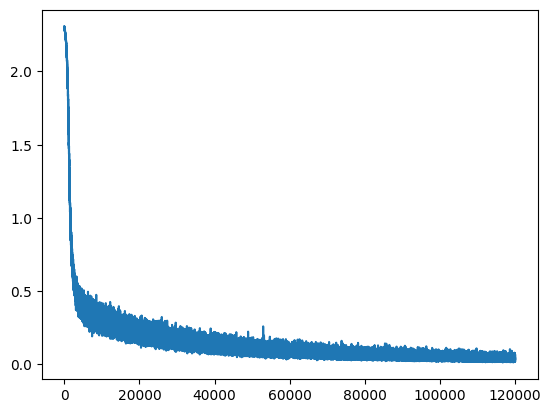

In [9]:
# train the network
train(model, train_loader, criterion, optimizer, 1000)

# test the network
test(model, test_loader)

In [10]:
print(test_labels[0].item())
model.forward(test_data[0])
print(torch.argmax(model.forward(test_data[0])).item())


7
7


In [11]:
# save the model
torch.save(model.state_dict(), "model.pt")

In [12]:
# load the model if needed
model = Net()
model.load_state_dict(torch.load("model.pt"))
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

{0: -3.04, 1: -0.36, 2: -2.91, 3: 5.08, 4: -0.8, 5: 7.43, 6: -2.3, 7: -1.78, 8: -0.29, 9: 0.31}
5


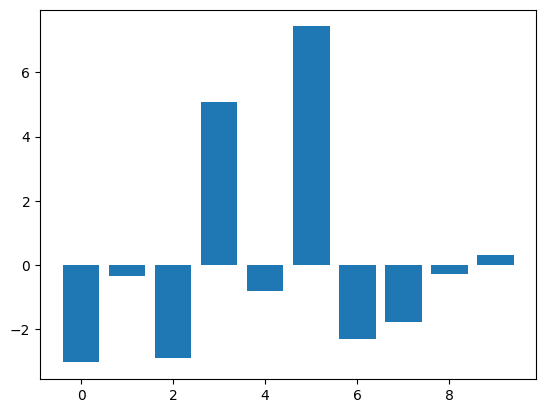

In [20]:
import csv

user_input = []
with open('user_input.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        for i in range(0, len(row)):
            row[i] = float(row[i])/255
        user_input.append(row)

user_input = torch.tensor(user_input)

prediction = model.forward(user_input[0])

# print prediction as dictionary of index: value to 2sf (rounded)
prediction_dict = {}
for i in range(0, len(prediction)):
    prediction_dict[i] = round(prediction[i].item(), 2)
print(prediction_dict)

# bar chart of prediction
plt.bar(range(len(prediction_dict)), list(prediction_dict.values()), align='center')


# print index of max value
print(torch.argmax(prediction).item())
